In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('datasets/linear-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
X = data['X'] 
y = data['y'] 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

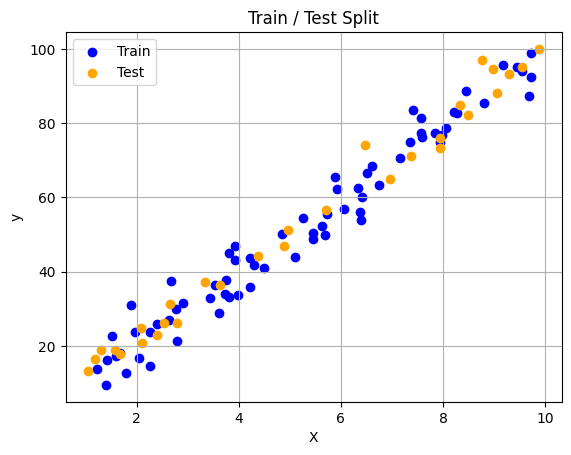

In [8]:
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Train / Test Split")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        y_pred = X[i] * w  + b
        error = (y_pred - y[i])**2
        cost += error
    cost = (1 / (2 * m)) * cost 
    return cost

In [10]:
cost = compute_cost(X_train, y_train, w=0, b=0)
print("Initial cost:", cost)

Initial cost: 1647.2899032268833


In [11]:
def compute_gradient(X, y, w, b):
    m = len(X)

    dj_dw = 0
    dj_db = 0 

    for i in range(m):
        y_pred = X[i] * w + b
        error = y_pred - y[i]

        dj_dw += error * X[i] 
        dj_db += error    

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [12]:
def gradient_descent(X, y, w, b, alpha, epochs):
    cost_history = []

    for i in range (epochs):
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db      

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

In [13]:
w = 0 
b = 0
alpha = 0.01
epochs = 10
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w, b, alpha, epochs)

In [14]:
def predict(X, w, b):
    return w * X + b

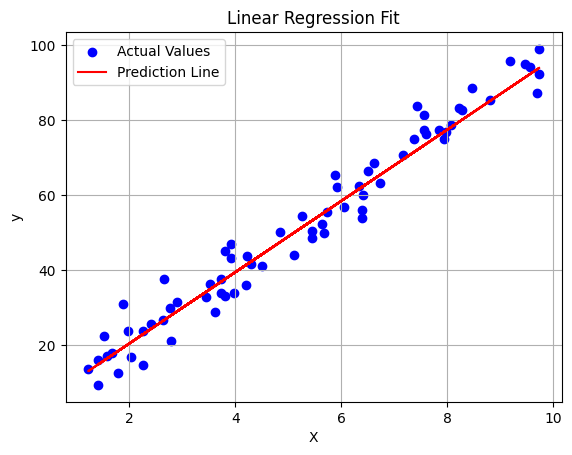

In [15]:
y_train_pred = predict(X_train, w_final, b_final)

plt.scatter(X_train, y_train, color='blue', label="Actual Values")
plt.plot(X_train, y_train_pred, color='red', label="Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

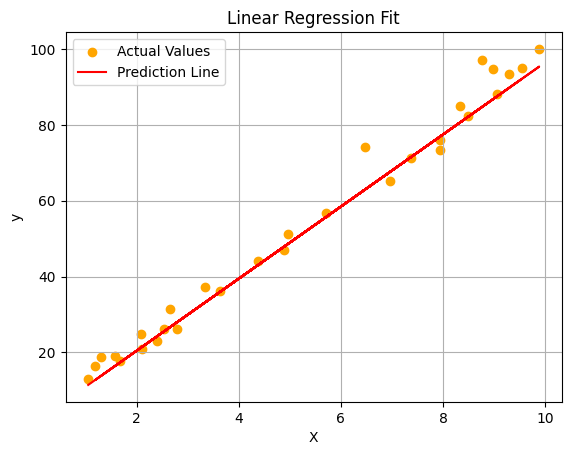

In [16]:
y_test_pred = predict(X_test, w_final, b_final)

plt.scatter(X_test, y_test, color='orange', label="Actual Values")
plt.plot(X_test, y_test_pred, color='red', label="Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 3.0385803987027904
MSE: 17.863585704324084
R2 Score: 0.9793978657116285
